In [1]:
from __future__ import print_function

import warnings
warnings.filterwarnings("ignore")

import logging
import numpy as np
from livelossplot import PlotLossesKeras

%matplotlib inline

Using TensorFlow backend.


### Setting up random state for reproducibility

In [2]:
RANDOM_STATE = 1234
np.random.seed(RANDOM_STATE)

### Setting up logger

In [3]:
# Logging configuration

logger = logging.getLogger(__name__)

handler = logging.StreamHandler()
formatter = logging.Formatter('%(asctime)s %(name)-5s %(levelname)-5s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.DEBUG)

### Restrict maximum features

We restrict the maximum number of features a.k.a. our inputs to be 5000. So only top 5000 words will be chosen from IMDB dataset. `load_data` automatically does a 50:50 train test split.

In [5]:
max_features = 5000
max_review_length = 500

In [6]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [7]:
logger.debug('Length of X_train: %(len)s', {'len': len(x_train)})
logger.debug('Length of X_test: %(len)s', {'len': len(x_test)})

2018-04-04 23:33:31,796 __main__ DEBUG Length of X_train: 25000
2018-04-04 23:33:31,796 __main__ DEBUG Length of X_test: 25000


In [8]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [9]:
logger.debug('Shape of X_train: %(shape)s', {'shape': X_train.shape})
logger.debug('Shape of X_test: %(shape)s', {'shape': X_test.shape})

2018-04-04 23:33:32,564 __main__ DEBUG Shape of X_train: (25000, 500)
2018-04-04 23:33:32,565 __main__ DEBUG Shape of X_test: (25000, 500)


### Simple LSTM

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout = 0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 771,713
Trainable params: 771,713
Non-trainable params: 0
_________________________________________________________________


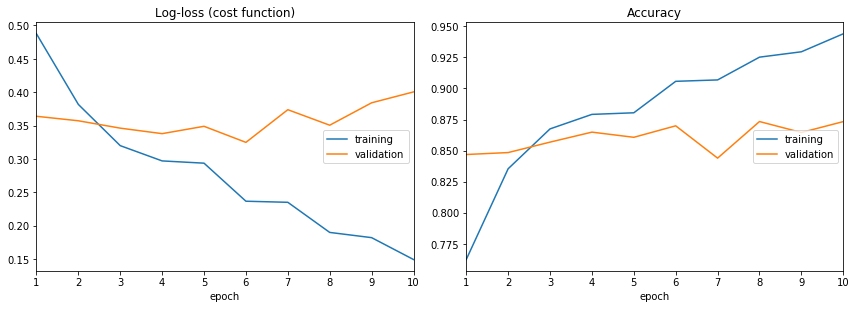

25000/25000 [==============================] - 311s 12ms/step - loss: 0.1493 - acc: 0.9440 - val_loss: 0.4005 - val_acc: 0.8734


In [12]:
model.fit(X_train, y_train, batch_size=64, epochs=10, callbacks=[PlotLossesKeras()], validation_data=(X_test, y_test))